In [ ]:
# Análise de Arquivos IFC com IfcOpenShell

Este notebook realiza a análise de arquivos IFC (Industry Foundation Classes) usando a biblioteca `IfcOpenShell`. O objetivo é carregar um arquivo IFC e realizar uma análise básica.

## Estrutura do Notebook
1. Configuração do Ambiente
2. Carregamento do Arquivo IFC
3. Definição de Funções
4. Análise do Arquivo IFC
5. Conclusão

# 1. Configuração do Ambiente

In [7]:
!pip install notebook
!pip install ifc-parser
!pip install ifcopenshell
!pip install pandas matplotlib
!pip install seaborn
!pip install pyvista ifcopenshell vtk
!pip install ifcopenshell pyvista

ERROR: Could not find a version that satisfies the requirement ifc-parser (from versions: none)
ERROR: No matching distribution found for ifc-parser


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ifcopenshell
import pyvista as pv
import numpy as np

# 2. Carregamento do Arquivo IFC

In [9]:
from google.colab import files
uploaded = files.upload()

import os
os.listdir()


Saving casa.ifc to casa (1).ifc


['.config', 'casa.ifc', 'casa (1).ifc', 'sample_data']

#3. Definindo funções

In [10]:
import ifcopenshell

def extrair_funcoes_ifc(file_path):
    # Abrir o arquivo IFC
    arquivo_ifc = ifcopenshell.open(file_path)

    # Obter todos os elementos do tipo 'IfcElement'
    elementos = arquivo_ifc.by_type("IfcElement")

    # Extrair funções e propriedades
    for elemento in elementos:
        tipo = elemento.is_a()
        nome = elemento.Name
        propriedades = {}

        if hasattr(elemento, 'PredefinedType'):
            propriedades['PredefinedType'] = elemento.PredefinedType

        # Mostrar informações do elemento
        print(f"Tipo: {tipo}")
        print(f"Nome: {nome}")
        print("Propriedades:")
        for chave, valor in propriedades.items():
            print(f"  {chave}: {valor}")
        print()

if __name__ == "__main__":
    file_path = 'casa.ifc'
    extrair_funcoes_ifc(file_path)


Tipo: IfcSlab
Nome: Floor:15cm - Concreto:855021
Propriedades:
  PredefinedType: FLOOR

Tipo: IfcSlab
Nome: Floor:15cm - Concreto:855203
Propriedades:
  PredefinedType: FLOOR

Tipo: IfcSlab
Nome: Floor:Porcelanato Cinza:855387
Propriedades:
  PredefinedType: FLOOR

Tipo: IfcSlab
Nome: Floor:Deck:855414
Propriedades:
  PredefinedType: FLOOR

Tipo: IfcWallStandardCase
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:855571
Propriedades:

Tipo: IfcOpeningElement
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:855571
Propriedades:

Tipo: IfcWallStandardCase
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:855886
Propriedades:

Tipo: IfcWall
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:856164
Propriedades:

Tipo: IfcWallStandardCase
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:856232
Propriedades:

Tipo: IfcWall
Nome: Basic Wall:15cm - Pintura Branca / Pintura Branca:856343
Propriedades:

Tipo: IfcWall
Nome: Basic Wall:15cm - Pintura Branca / Pint

# 4. Análise do Arquivo Ifc

### *Contando elementos*

In [11]:
caminho_ifc = 'casa.ifc'

# Abrir o arquivo IFC
arquivo_ifc = ifcopenshell.open(caminho_ifc)

# Exibir os primeiros 5 elementos para verificar o conteúdo
elementos = arquivo_ifc.by_type("IfcElement")
print(f"Total de elementos encontrados: {len(elementos)}")


Total de elementos encontrados: 456


### *Criar uma lista com os dados de um elemento específico*

In [12]:
# Obter todos os elementos do tipo IfcWall
paredes = arquivo_ifc.by_type("IfcWall")

# Criar uma lista com dados das paredes
dados_paredes = []
for parede in paredes:
    dados_paredes.append({
        "ID": parede.id(),
        "Nome": parede.Name,
        "Tipo": parede.is_a()
    })

# Converter para um DataFrame do Pandas
df_paredes = pd.DataFrame(dados_paredes)

# Mostrar as primeiras linhas do DataFrame
df_paredes.head()

,ID,Nome,Tipo
0,370,Basic Wall:15cm - Pintura Branca / Pintura Bra...,IfcWallStandardCase
1,473,Basic Wall:15cm - Pintura Branca / Pintura Bra...,IfcWallStandardCase
2,586,Basic Wall:15cm - Pintura Branca / Pintura Bra...,IfcWall
3,623,Basic Wall:15cm - Pintura Branca / Pintura Bra...,IfcWallStandardCase
4,698,Basic Wall:15cm - Pintura Branca / Pintura Bra...,IfcWall


### *Extraindo todos os dados do Ifc*

In [13]:
# Obter todos os elementos do arquivo
elementos = arquivo_ifc.by_type("IfcElement")

# Criar uma lista com os nomes dos elementos
nomes_elementos = []
for elemento in elementos:
    nome = elemento.Name
    if nome:  # Verificar se o nome não é None
        nomes_elementos.append({
            "ID": elemento.id(),
            "Nome": nome,
            "Tipo": elemento.is_a()
        })

# Converter para um DataFrame do Pandas
import pandas as pd
df_elementos = pd.DataFrame(nomes_elementos)

# Mostrar as primeiras linhas do DataFrame
print(df_elementos.head())

# Mostrar todos os nomes únicos de elementos
print("\nNomes únicos de elementos:")
print(df_elementos["Nome"].unique())


    ID                                               Nome                 Tipo
0  152                       Floor:15cm - Concreto:855021              IfcSlab
1  206                       Floor:15cm - Concreto:855203              IfcSlab
2  237                     Floor:Porcelanato Cinza:855387              IfcSlab
3  297                                  Floor:Deck:855414              IfcSlab
4  370  Basic Wall:15cm - Pintura Branca / Pintura Bra...  IfcWallStandardCase

Nomes únicos de elementos:
['Floor:15cm - Concreto:855021' 'Floor:15cm - Concreto:855203'
 'Floor:Porcelanato Cinza:855387' 'Floor:Deck:855414'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:855571'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:855886'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:856164'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:856232'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:856343'
 'Basic Wall:15cm - Pintura Branca / Pintura Branca:856488'
 'Basic Wall:15cm - P

### *Extraindo dados por tipo*

In [14]:
def extract_all_ifc_data(ifc_file):
    # Obter todos os tipos de entidades no arquivo IFC
    entities = {}
    types = [
        "IfcWall",
        "IfcDoor",
        "IfcWindow",
        "IfcColumn",
        "IfcBeam",
        "IfcSlab",
        "IfcSpace",
        "IfcBuilding",
        "IfcProject",
        "IfcSite"
    ]

    for entity_type in types:
        # Coletar todas as instâncias do tipo de entidade
        items = ifc_file.by_type(entity_type)
        for item in items:
            entity_id = item.GlobalId
            entity_data = {"ID": entity_id, "Type": entity_type}

            # Extrair todos os atributos e propriedades do item
            for attr in dir(item):
                if not attr.startswith("_"):
                    value = getattr(item, attr, "Não disponível")
                    if not callable(value):
                        entity_data[attr] = value
            if entity_type not in entities:
                entities[entity_type] = []
            entities[entity_type].append(entity_data)

    return entities

def save_data_to_csv(data_dict):
    for entity_type, data_list in data_dict.items():
        # Criar um DataFrame
        df = pd.DataFrame(data_list)

        # Salvar o DataFrame em um arquivo CSV
        filename = f"{entity_type}_data.csv"
        df.to_csv(filename, index=False)
        print(f"Dados de {entity_type} exportados para {filename}")

def main(ifc_file_path):
    # Carregar o arquivo IFC
    ifc_file = ifcopenshell.open(ifc_file_path)

    # Extrair todos os dados
    all_data = extract_all_ifc_data(ifc_file)

    # Salvar os dados em arquivos CSV
    save_data_to_csv(all_data)

if __name__ == "__main__":
    main("casa.ifc")

Dados de IfcWall exportados para IfcWall_data.csv
Dados de IfcDoor exportados para IfcDoor_data.csv
Dados de IfcWindow exportados para IfcWindow_data.csv
Dados de IfcColumn exportados para IfcColumn_data.csv
Dados de IfcBeam exportados para IfcBeam_data.csv
Dados de IfcSlab exportados para IfcSlab_data.csv
Dados de IfcBuilding exportados para IfcBuilding_data.csv
Dados de IfcProject exportados para IfcProject_data.csv
Dados de IfcSite exportados para IfcSite_data.csv


### *Criando gráficos com python*

    ID                                               Nome                 Tipo
0  152                       Floor:15cm - Concreto:855021              IfcSlab
1  206                       Floor:15cm - Concreto:855203              IfcSlab
2  237                     Floor:Porcelanato Cinza:855387              IfcSlab
3  297                                  Floor:Deck:855414              IfcSlab
4  370  Basic Wall:15cm - Pintura Branca / Pintura Bra...  IfcWallStandardCase


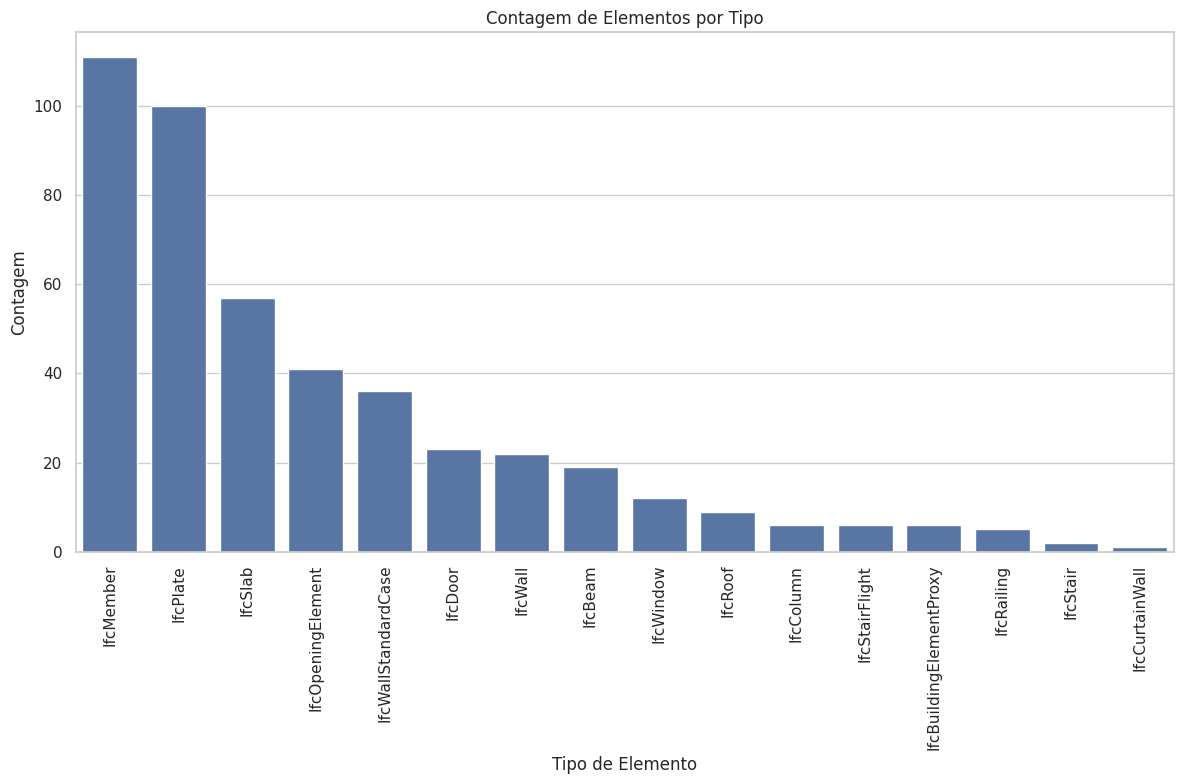

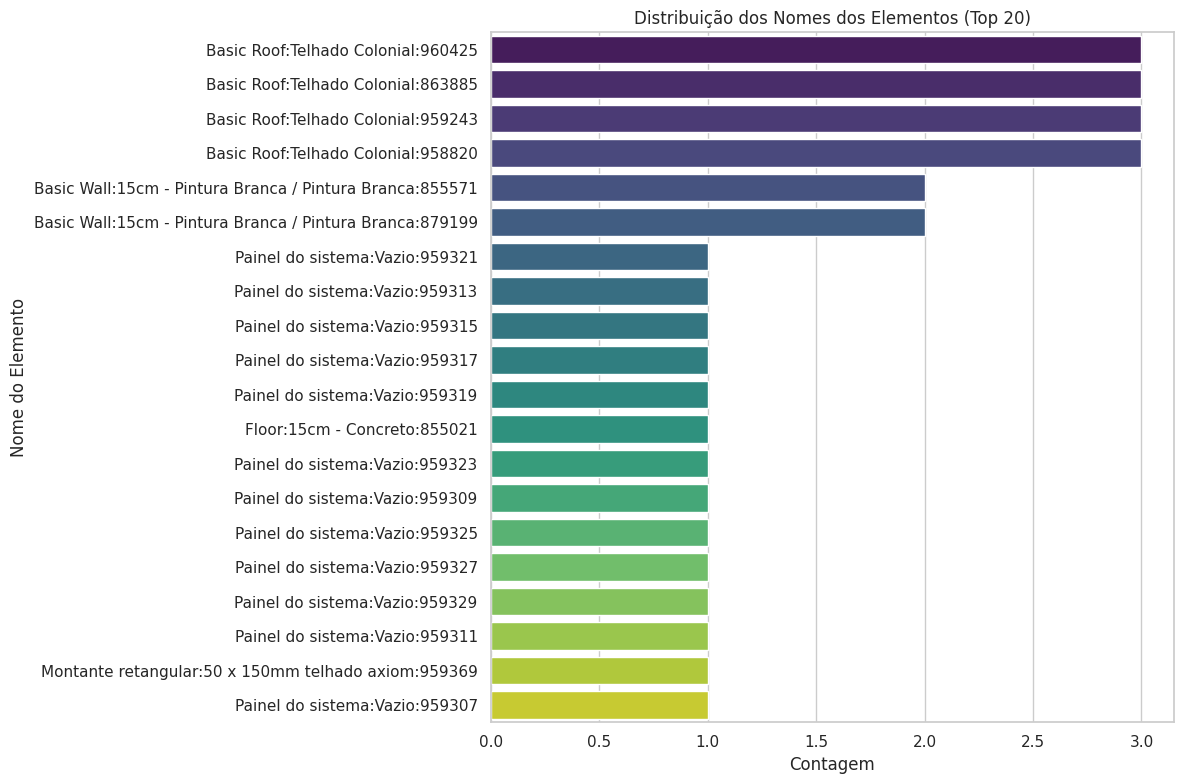

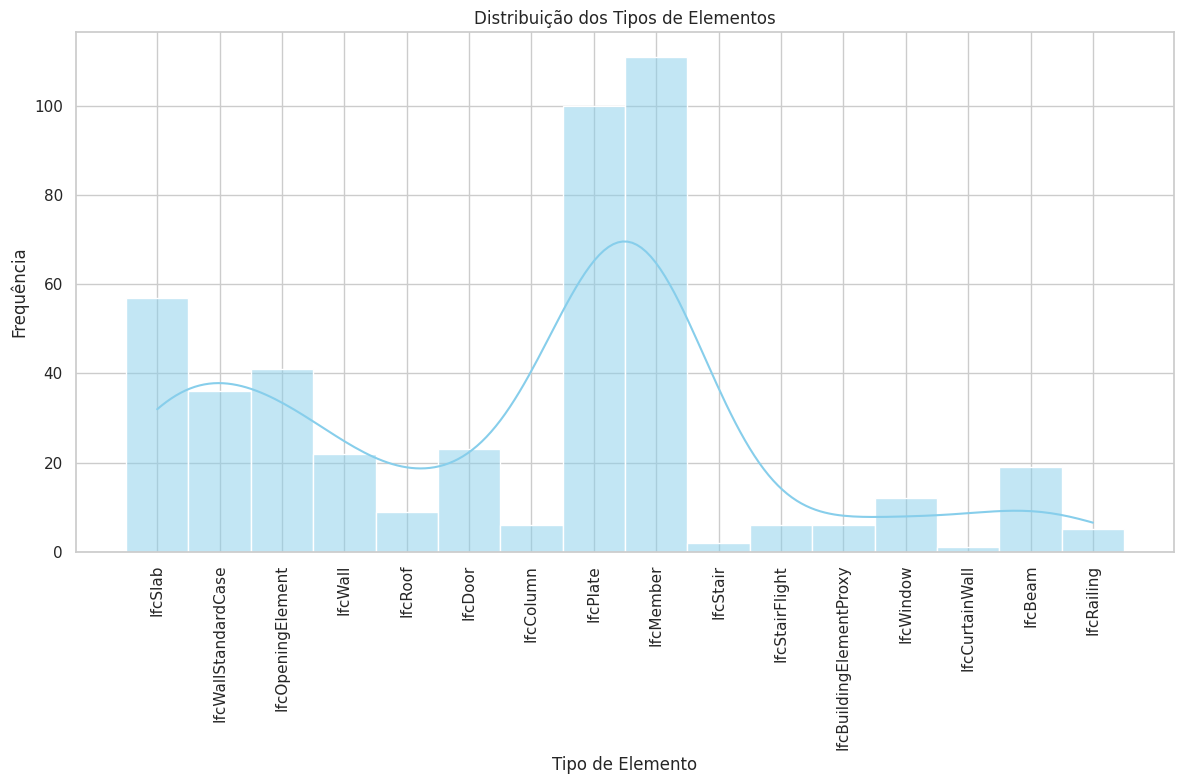

In [15]:
# Carregar o arquivo IFC
file_path = 'casa.ifc'
arquivo_ifc = ifcopenshell.open(file_path)

# Obter todos os elementos do arquivo
elementos = arquivo_ifc.by_type("IfcElement")

# Criar uma lista com os nomes dos elementos
nomes_elementos = []
for elemento in elementos:
    nome = elemento.Name
    if nome:  # Verificar se o nome não é None
        nomes_elementos.append({
            "ID": elemento.id(),
            "Nome": nome,
            "Tipo": elemento.is_a()
        })

# Converter para um DataFrame do Pandas
df_elementos = pd.DataFrame(nomes_elementos)

# Mostrar as primeiras linhas do DataFrame
print(df_elementos.head())

# Visualização Avançada

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.countplot(data=df_elementos, x="Tipo", order=df_elementos["Tipo"].value_counts().index)
plt.title('Contagem de Elementos por Tipo')
plt.xlabel('Tipo de Elemento')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
top_nomes = df_elementos['Nome'].value_counts().head(20)
sns.barplot(y=top_nomes.index, x=top_nomes.values, palette="viridis")
plt.title('Distribuição dos Nomes dos Elementos (Top 20)')
plt.xlabel('Contagem')
plt.ylabel('Nome do Elemento')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df_elementos['Tipo'], kde=True, bins=len(df_elementos['Tipo'].unique()), color="skyblue")
plt.title('Distribuição dos Tipos de Elementos')
plt.xlabel('Tipo de Elemento')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
